In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
m1 = np.random.randint(2, size=(20, 20))
print(m1)

[[0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1]
 [0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1]
 [1 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0]
 [0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1]
 [0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0]
 [1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0]
 [1 1 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1]
 [0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1]
 [0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1]
 [0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0]
 [1 1 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1]
 [0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1]
 [0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1]
 [0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0]
 [0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0]
 [1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1 1]]


In [8]:
def getSparsity(A):
    """Gets column Sparsity"""
    A = np.nan_to_num(A,0)
    sparsity =np.count_nonzero(A)/A.size
    return 1-sparsity

getSparsity(m1)

0.48750000000000004

(array([1., 0., 2., 5., 7., 4., 1., 0., 0.]),
 array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 9 Patch objects>)

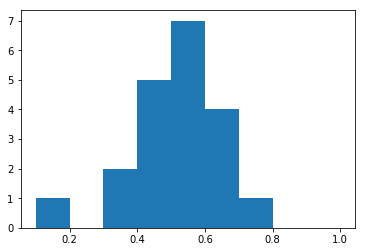

In [9]:
def getColSparsity(A):
    """Gets column Sparsity"""
    colSparsity =[getSparsity(col) for col in A.T]
    return colSparsity

plt.hist(getColSparsity(m1),bins=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

In [5]:
def getColContiguousNZ(col):
    """Returns one dictionary"""
    nz_dict = {}

    count_nz = 0

    for i, v in enumerate(col):
        if v != 0:
            count_nz += 1
        else:
            
            if count_nz != 0:
                if count_nz in nz_dict:
                    nz_dict[count_nz] += 1
                    count_nz =0
                else:
                    nz_dict[count_nz] =1
                    count_nz=0
    return nz_dict

[[1 5 2]
 [1 1 1]]


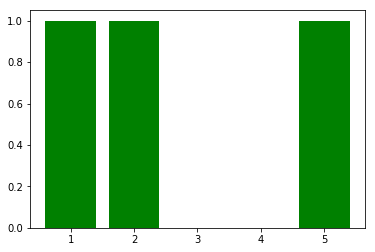

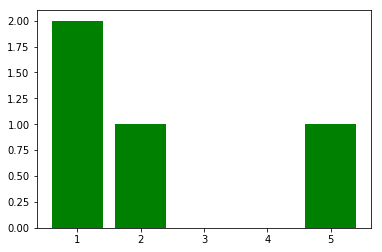

In [6]:
def getArrayContiguousNZandZ(input_array):
    """Returns two dictionaries: histogram of contiguous non-zeros and histogram of contiguous zeros"""
    nz_dict = {}
    z_dict = {}
    count_nz = 0
    count_z = 0
    for i, v in enumerate(input_array):
        if v != 0:
            count_nz += 1
            
            if count_z != 0:
                if count_z in z_dict:
                    z_dict[count_z] += 1
                    count_z =0
                else:
                    z_dict[count_z] =1
                    count_z=0
        else:
            count_z += 1
            
            if count_nz != 0:
                if count_nz in nz_dict:
                    nz_dict[count_nz] += 1
                    count_nz =0
                else:
                    nz_dict[count_nz] =1
                    count_nz=0
    return nz_dict, z_dict

nz_dict, z_dict = getArrayContiguousNZandZ(m1[:,0])

plt.figure()
plt.bar(nz_dict.keys(), nz_dict.values(), color='g')
plt.figure()
plt.bar(z_dict.keys(), z_dict.values(), color='g')
print(np.row_stack((list(nz_dict.keys()), list(nz_dict.values()))))

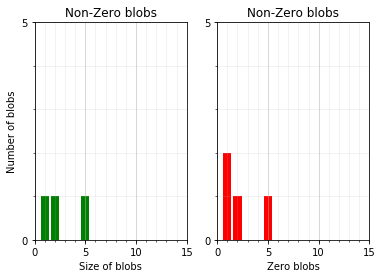

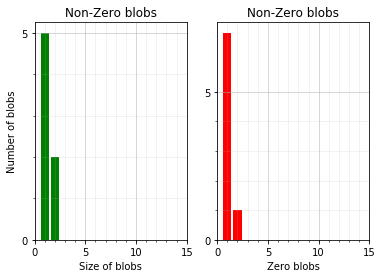

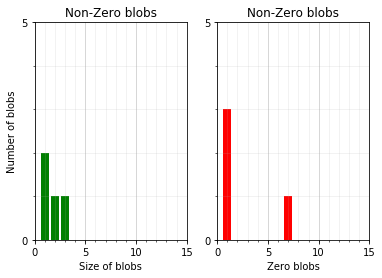

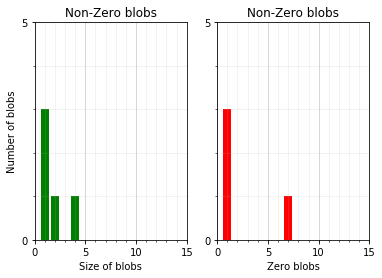

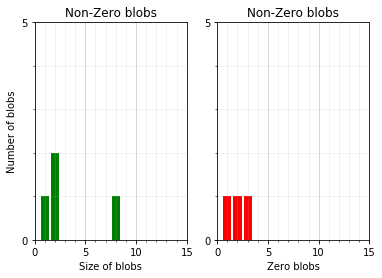

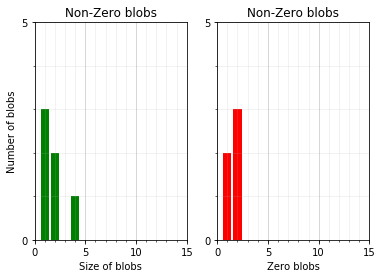

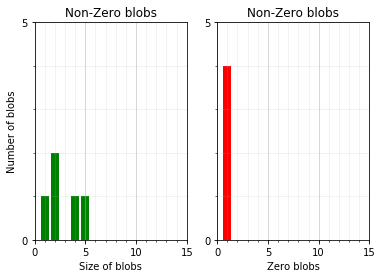

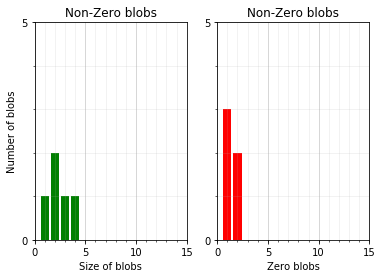

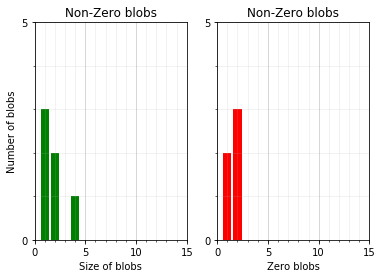

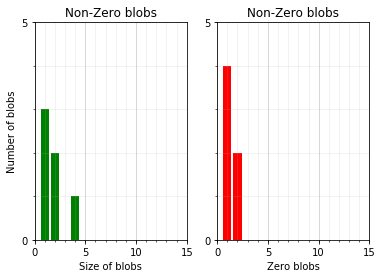

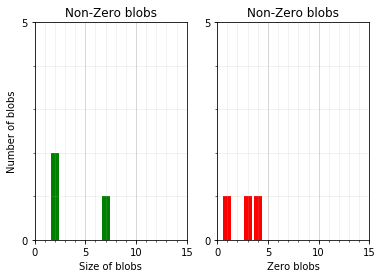

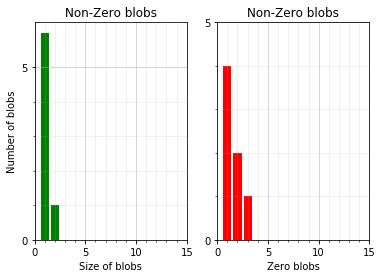

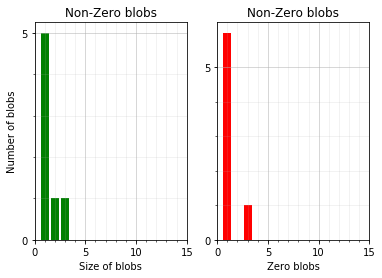

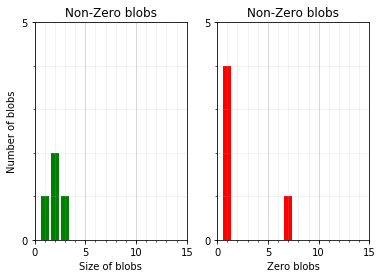

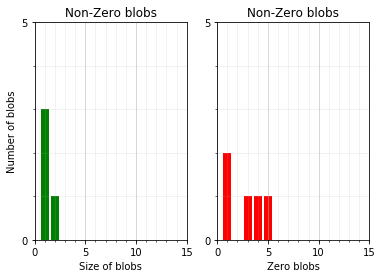

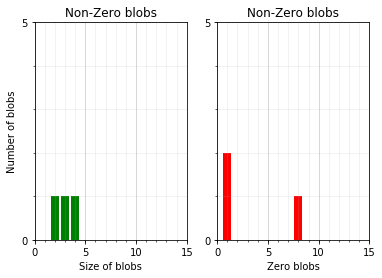

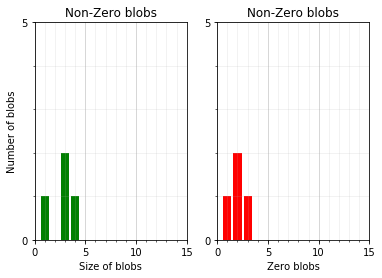

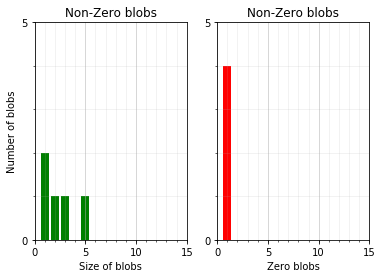

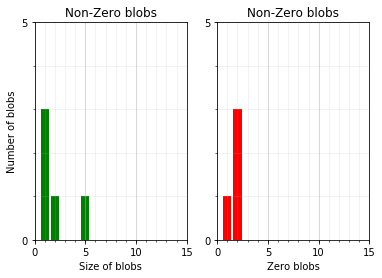

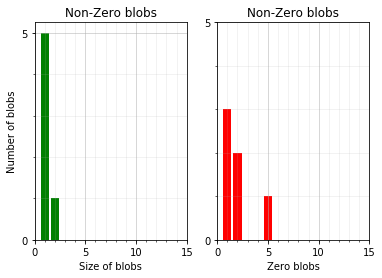

In [7]:
def addGridToHistogram(ax,x_ticks_limit=16,y_ticks_limit=16):
    x_major_ticks = np.arange(0, x_ticks_limit, 5)
    y_major_ticks = np.arange(0, y_ticks_limit, 5)
    
    x_minor_ticks = np.arange(0, x_ticks_limit, 1)
    y_minor_ticks = np.arange(0, y_ticks_limit, 1)
    
    ax.set_xticks(x_major_ticks)
    ax.set_xticks(x_minor_ticks, minor=True)
    ax.set_yticks(y_major_ticks)
    ax.set_yticks(y_minor_ticks, minor=True)

    # And a corresponding grid
    ax.grid(which='both')

    # Or if you want different settings for the grids:
    ax.grid(which='minor', alpha=0.2)
    ax.grid(which='major', alpha=0.5)

for col in m1.T:
    nz_dict, z_dict = getArrayContiguousNZandZ(col)
    plt.figure()
    
    ax1 = plt.subplot(1, 2, 1)
    plt.bar(nz_dict.keys(), nz_dict.values(), color='g')
    plt.title('Non-Zero blobs')
    plt.ylabel('Number of blobs')
    plt.xlabel('Size of blobs')
    addGridToHistogram(ax1,y_ticks_limit=6)
    
    ax2 = plt.subplot(1, 2, 2)
    plt.bar(z_dict.keys(), z_dict.values(), color='r')
    plt.title('Non-Zero blobs')
    plt.xlabel('Zero blobs')
    addGridToHistogram(ax2,y_ticks_limit=6)

    
plt.show()

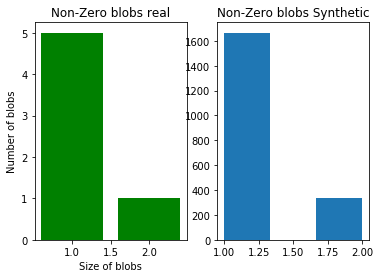

In [8]:
def calculateCDFfromCountList(list_of_counts):
    cdf = np.cumsum(list_of_counts)
    cdf = cdf / cdf[-1]
    return cdf

def calculateCDFfromDict(my_dict):
    list_of_counts = list(my_dict.values())
    return calculateCDFfromCountList(list_of_counts)

cdf = calculateCDFfromDict(nz_dict)

def getBinIndexFromCDF(cdf):
    return np.searchsorted(cdf,np.random.rand())

def getBinFromCDFandBins(cdf,bins):
    return bins[getBinIndexFromCDF(cdf)]

def getBinFromCDFandDict(cdf,my_dict):
    return list(my_dict.keys())[getBinIndexFromCDF(cdf)]

cdf = calculateCDFfromDict(nz_dict)
values = np.random.rand(2000)

random_bin_from_cdf = [getBinFromCDFandDict(cdf,nz_dict) for val in values]

plt.figure()
ax1 = plt.subplot(1, 2, 1)
plt.bar(nz_dict.keys(), nz_dict.values(), color='g')
plt.title('Non-Zero blobs real')
plt.ylabel('Number of blobs')
plt.xlabel('Size of blobs')

ax2= plt.subplot(1, 2, 2)
plt.hist(random_bin_from_cdf, 3)
plt.title('Non-Zero blobs Synthetic')
plt.show()

In [9]:

print("Hist values\t{}".format(list(nz_dict.values())))
print("Bins values\t{}".format(list(nz_dict.keys())))
print("cdf values\t{}".format(cdf))

print("A random bin: {}".format(getBinFromCDFandBins(cdf,list(nz_dict.keys()))))
print("A random bin: {}".format(getBinFromCDFandDict(cdf,nz_dict)))

Hist values	[5, 1]
Bins values	[1, 2]
cdf values	[0.83333333 1.        ]
A random bin: 1
A random bin: 1
